### Learning Pandas

# Bike Store Sales

Analyze sales made in a Bike Shop.

---
## Intro

### Importing libraries & Reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sales_df = pd.read_csv('data/sales_data.csv')

### First look at the data

In [3]:
sales_df.shape

(5000, 16)

In [4]:
sales_df.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [5]:
sales_df.tail()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4995,2014-01-27,27,January,2014,34,M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,58,98
4996,2014-07-14,14,July,2014,17,M,France,Val d'Oise,Clothing,Caps,AWC Logo Cap,12,7,9,1,85
4997,2013-12-30,30,December,2013,25,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,433,693
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32
4999,2014-03-09,9,March,2014,50,F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,25


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


---
## Cleaning data

### Fixing data types

- Change `Date` to `datetime`.
- Change `Customer_Gender`, `Country`, `State`, `Product_Category` and `Sub_Category` to `category`.

In [7]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [8]:
sales_df[['Date']].dtypes

Date    datetime64[ns]
dtype: object

In [9]:
cols = ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']
for col in cols:
    sales_df[col] = sales_df[col].astype('category')

In [10]:
sales_df[cols].dtypes

Customer_Gender     category
Country             category
State               category
Product_Category    category
Sub_Category        category
dtype: object

### Statistics summary of the data

In [11]:
sales_df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
std,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000


---
## Analyzing data

### Customers

- Average age of the customers with a **density** and a **box plot**:

In [12]:
sales_df['Customer_Age'].mean()

35.9338

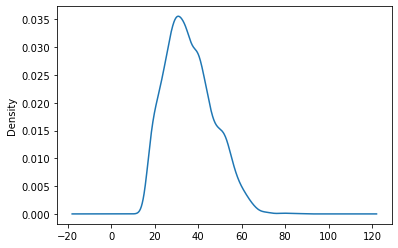

In [13]:
sales_df['Customer_Age'].plot(kind='density');

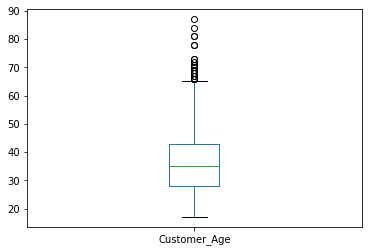

In [14]:
sales_df['Customer_Age'].plot(kind='box');

- Sales per `Customer_Gender` with a **bar plot**:

In [15]:
sales_per_gender = sales_df['Customer_Gender'].value_counts()
sales_per_gender

M    2564
F    2436
Name: Customer_Gender, dtype: int64

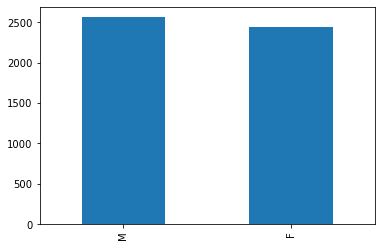

In [16]:
sales_per_gender.plot(kind='bar');

### Country

- List of `Country`:

In [17]:
sales_df['Country'].unique()

['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']

- Sales per `Country` with a **bar plot**:

In [18]:
sales_per_country = sales_df['Country'].value_counts()
sales_per_country

United States     1700
Australia         1066
Canada             657
United Kingdom     604
France             489
Germany            484
Name: Country, dtype: int64

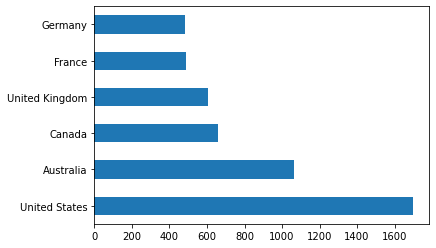

In [19]:
sales_per_country.plot(kind='barh');

- Relationship between the `Customer_Age` per `Country` with a grouped **box plot**:

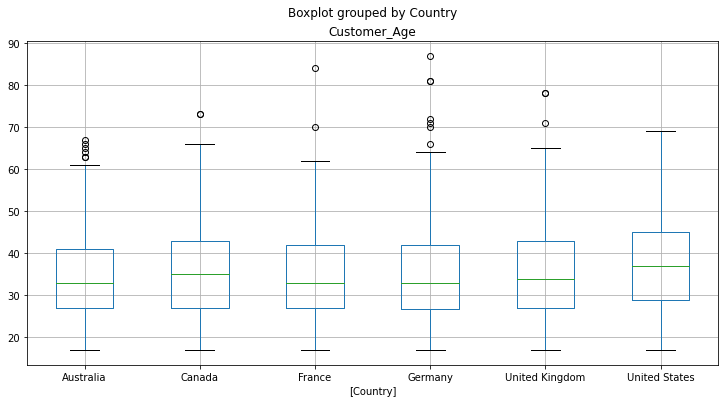

In [20]:
sales_df[['Customer_Age', 'Country']].boxplot(by='Country', 
                                              figsize = (12,6));

### Sales through time

- Sort the data by `Date` and reset index:

In [21]:
sales_df.sort_values(['Date'], ascending=False, inplace=True)
sales_df.reset_index(drop=True, inplace=True)
sales_df.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2016-07-31,31,July,2016,47,F,United Kingdom,England,Accessories,Tires and Tubes,Touring Tire,26,11,29,438,724
1,2016-07-31,31,July,2016,48,F,United Kingdom,England,Clothing,Caps,AWC Logo Cap,16,7,9,26,138
2,2016-07-31,31,July,2016,40,F,United States,Washington,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,9,25
3,2016-07-30,30,July,2016,65,M,Australia,Victoria,Accessories,Helmets,"Sport-100 Helmet, Black",14,13,35,205,387
4,2016-07-30,30,July,2016,41,F,Canada,British Columbia,Accessories,Hydration Packs,Hydration Pack - 70 oz.,5,21,55,167,272


- Sales per `Year` with a **pie plot** and a **bar plot**:

In [22]:
sales_per_year = sales_df['Year'].value_counts()
sales_per_year

2014    1327
2016    1272
2015    1123
2013    1040
2011     126
2012     112
Name: Year, dtype: int64

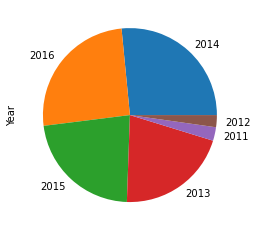

In [23]:
sales_per_year.plot(kind='pie');

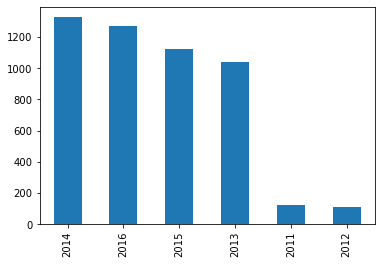

In [24]:
sales_per_year.plot(kind='bar');

- Create a new `YearMonth` column: `YearMonth` = `str(Year)` + `Month`, separated by a `-`:

In [25]:
sales_df['YearMonth'] = sales_df['Year'].astype('str') + '-' + sales_df['Month']
sales_df['YearMonth']

0          2016-July
1          2016-July
2          2016-July
3          2016-July
4          2016-July
            ...     
4995    2011-January
4996    2011-January
4997    2011-January
4998    2011-January
4999    2011-January
Name: YearMonth, Length: 5000, dtype: object

- Sales per `YearMonth` with a **bar plot**:

In [26]:
sales_per_yearmonth = sales_df['YearMonth'].value_counts()
sales_per_yearmonth

2015-December    232
2016-April       218
2013-December    215
2014-June        215
2016-May         214
                ... 
2012-December      7
2012-February      6
2011-June          6
2011-February      6
2012-March         4
Name: YearMonth, Length: 62, dtype: int64

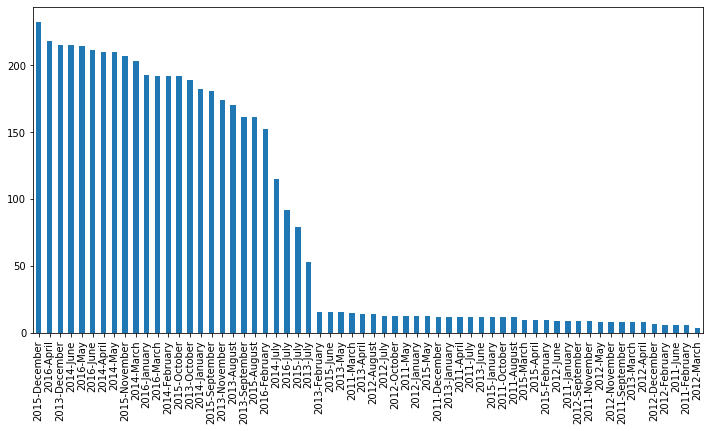

In [27]:
sales_per_yearmonth.plot(kind='bar', 
                         figsize=(12,6));

### Product

- List of `Product`:

In [28]:
product_list = sales_df['Product'].unique()
product_list

array(['Touring Tire', 'AWC Logo Cap', 'Patch Kit/8 Patches',
       'Sport-100 Helmet, Black', 'Hydration Pack - 70 oz.',
       'Water Bottle - 30 oz.', 'ML Mountain Tire', 'Touring Tire Tube',
       'Sport-100 Helmet, Blue', 'ML Road Tire',
       'Short-Sleeve Classic Jersey, S', 'Mountain Tire Tube',
       'Road Tire Tube', "Women's Mountain Shorts, M",
       'Mountain Bottle Cage', 'Fender Set - Mountain', 'HL Road Tire',
       'Sport-100 Helmet, Red', 'Short-Sleeve Classic Jersey, L',
       'Classic Vest, L', 'Racing Socks, M', 'HL Mountain Tire',
       'Long-Sleeve Logo Jersey, S', 'Long-Sleeve Logo Jersey, L',
       'LL Mountain Tire', 'LL Road Tire', "Women's Mountain Shorts, S",
       'Racing Socks, L', "Women's Mountain Shorts, L",
       'Bike Wash - Dissolver', 'Touring-3000 Yellow, 58',
       'Touring-2000 Blue, 50', 'Mountain-100 Silver, 44',
       'Road Bottle Cage', 'Mountain-200 Black, 42',
       'Mountain-200 Black, 46', 'Mountain-400-W Silver, 40',
     

- Top 10 best-selling sold products with a **bar plot**:

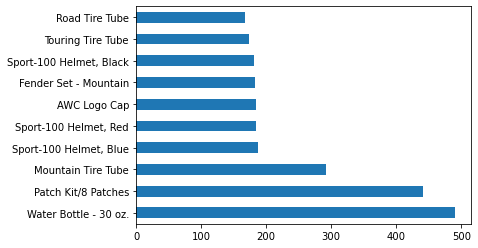

In [29]:
sales_df['Product'].value_counts().head(10).plot(kind='barh');

- Sales per category with a **pie chart**:

In [30]:
sales_per_category = sales_df['Product_Category'].value_counts()
sales_per_category

Accessories    3090
Bikes          1166
Clothing        744
Name: Product_Category, dtype: int64

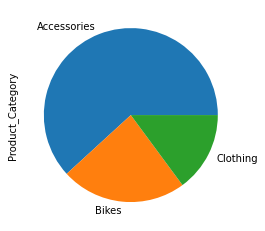

In [31]:
sales_per_category.plot(kind='pie');

### Sales

- Average number of orders with a **histogram** and a **box plot**:

In [32]:
sales_df['Order_Quantity'].mean()

11.8204

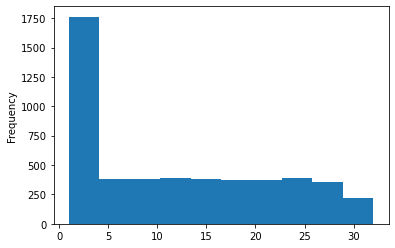

In [33]:
sales_df['Order_Quantity'].plot(kind='hist');

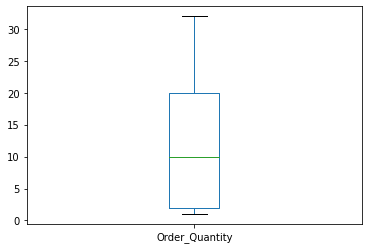

In [34]:
sales_df['Order_Quantity'].plot(kind='box');

* Create a new `Cost` column: `Cost` = `Unit_Cost` * `Order_Quantity`:

In [35]:
sales_df['Cost'] = sales_df['Unit_Cost'] * sales_df['Order_Quantity']
sales_df['Cost']

0        286
1        112
2         16
3        182
4        105
        ... 
4995    8684
4996    3756
4997     344
4998    1083
4999     344
Name: Cost, Length: 5000, dtype: int64

- Relationship between `Unit_Cost` and `Unit_Price` with a **scatter plot**:

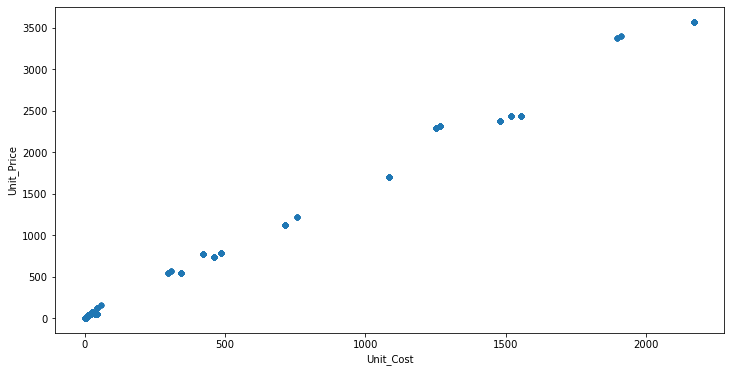

In [36]:
sales_df.plot(kind='scatter', 
              x='Unit_Cost', 
              y='Unit_Price', 
              figsize = (12,6));

- Relationship between `Order_Quantity` and `Profit` with a **scatter plot**:

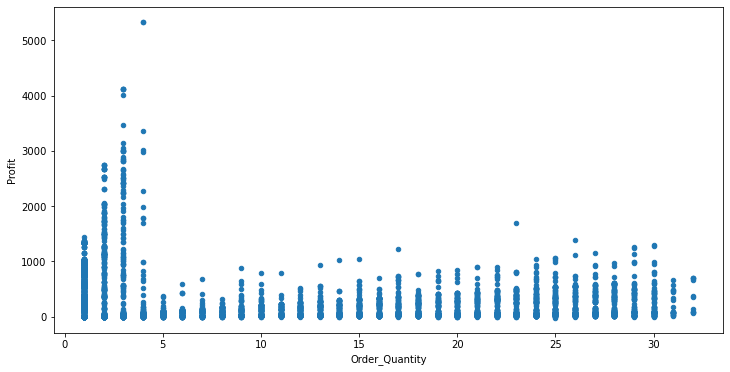

In [37]:
sales_df.plot(kind='scatter', 
              x='Order_Quantity', 
              y='Profit', 
              figsize=(12,6));

- Relationship between `Profit` per `Country` with a grouped **box plot**:

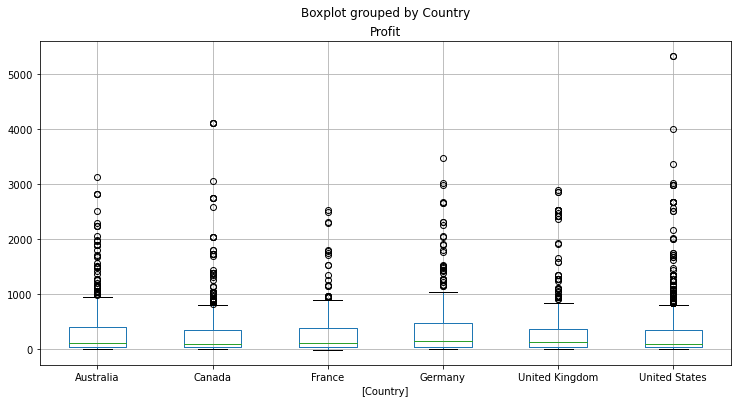

In [38]:
sales_df[['Profit', 'Country']].boxplot(by='Country', 
                                        figsize=(12,6));

## Questions

- Increase $50 revenue to every sale

In [39]:
sales_df['Revenue'] += 50

- How many orders were made in `Canada` or `France`?

In [40]:
sales_df.loc[(sales_df['Country'] == 'Canada') | (sales_df['Country'] == 'France')].shape[0]

1146

- How many `Bike Racks` orders were made from Canada?

In [41]:
sales_df.loc[(sales_df['Country'] == 'Canada') & (sales_df['Sub_Category'] == 'Bike Racks')].shape[0]

3

- How many orders were made in each region (state) of France? Show a **bar plot**.

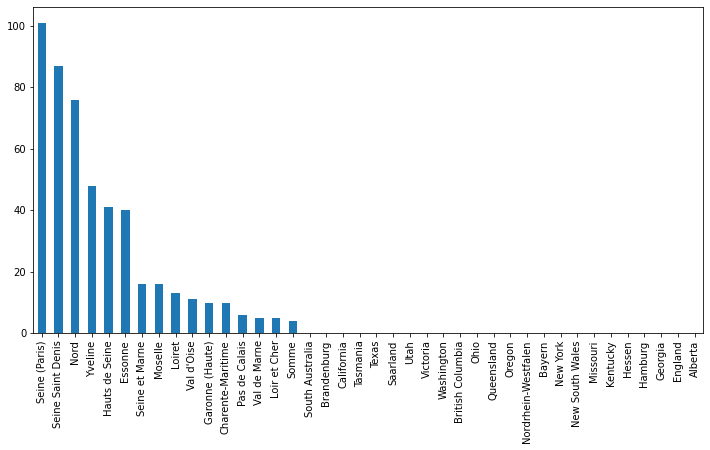

In [42]:
france_sales = sales_df.loc[sales_df['Country'] == 'France', 'State'].value_counts()
france_sales.plot(kind='bar', 
                  figsize=(12,6));

- How many orders were made per `Accessories` sub-categories? Show a **bar plot**.

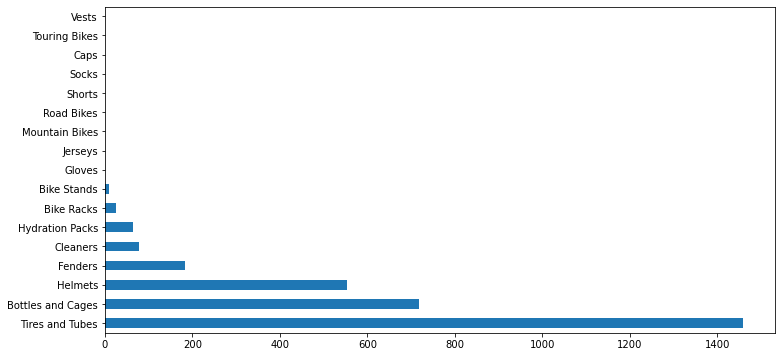

In [43]:
accessories_sales = sales_df.loc[sales_df['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
accessories_sales.plot(kind='barh', 
                       figsize=(12,6));

- How many orders were made per `Bikes` sub-categories?. Show a **pie chart**:

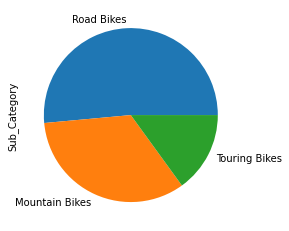

In [44]:
bikes_sales = sales_df.loc[sales_df['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
bikes_sales.plot(kind='pie');

- How many sales with more than 500 in `Revenue` were made by men?

In [45]:
sales_df.loc[(sales_df['Customer_Gender'] == 'M') & (sales_df['Revenue'] == 500)].shape[0]

1

- Top 5 sales with the highest revenue

In [46]:
sales_df.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,YearMonth,Cost
4970,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,2011-March,8684
4995,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,2011-January,8684
1443,2015-12-11,11,December,2015,44,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,2015-December,6513
4874,2011-12-29,29,December,2011,25,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,2011-December,6513
1094,2016-01-28,28,January,2016,34,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,2016-January,6513


- The sale with the highest revenue

In [47]:
#sales.sort_values(['Revenue'], ascending=False).head(1)

sales_df.loc[sales_df['Revenue'] == sales_df['Revenue'].max()]

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,YearMonth,Cost
4970,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,2011-March,8684
4995,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,2011-January,8684


- What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [48]:
sales_df.loc[sales_df['Revenue'] > 10_000, 'Order_Quantity'].mean()

3.25

- What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [49]:
sales_df.loc[sales_df['Revenue'] < 10_000, 'Order_Quantity'].mean()

11.834134615384615

- How many orders were made in May of 2016?

In [50]:
sales_df.loc[(sales_df['Year'] == 2016) & (sales_df['Month'] == 'May')].shape[0]

214

- How many orders were made between May and July of 2016?

In [51]:
sales_df.loc[(sales_df['Year'] == 2016) & (sales_df['Month'].isin(['May', 'June', 'July']))].shape[0]

517

- Show a grouped <b>box plot</b> per month of 2016 with the profit values

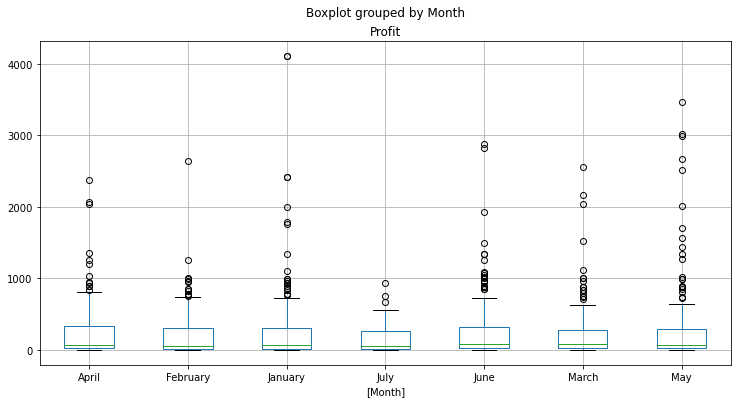

In [52]:
profit_2016 = sales_df.loc[sales_df['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', 
                    figsize=(12,6));

- Add 7.2% TAX on every sale `Unit_Price` within United States

In [53]:
sales_df.loc[sales_df['Country'] == 'United States', 'Unit_Price'] *= 1.072
sales_df.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,YearMonth,Cost
0,2016-07-31,31,July,2016,47,F,United Kingdom,England,Accessories,Tires and Tubes,Touring Tire,26,11,29.000,438,774,2016-July,286
1,2016-07-31,31,July,2016,48,F,United Kingdom,England,Clothing,Caps,AWC Logo Cap,16,7,9.000,26,188,2016-July,112
2,2016-07-31,31,July,2016,40,F,United States,Washington,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2.144,9,75,2016-July,16
3,2016-07-30,30,July,2016,65,M,Australia,Victoria,Accessories,Helmets,"Sport-100 Helmet, Black",14,13,35.000,205,437,2016-July,182
4,2016-07-30,30,July,2016,41,F,Canada,British Columbia,Accessories,Hydration Packs,Hydration Pack - 70 oz.,5,21,55.000,167,322,2016-July,105
